### Confusion matrix for i-RAVDESS
#### the data is fake

This is the y_test(actual, taget label): [0 4 3 7 5 5 4 7 7 7 6 7 5 6 5 1 4 5 0 5 0 2 5 7 3 1 0 0 6 4 6 6 0 2 3 2 7
 0 0 4 4 2 2 5 2 4 1 2 1 1 6 0 4 3 4 7 2 6 4 7 0 5 2 1 7 7 3 2 6 5 5 0 1 4
 2 4 3 3 7 3 3 3 1 3 0 6 4 7 0 7 3 7 5 6 2 1 1 3 5 6 2 1 6 4 0 5 5 7 3 7 4
 7 6 0 1 1 4 7 1 0 1 4 5 6 6 0 2 1 3 0 3 5 7 1 1 3 4 4 2 3 1 0 0 6 0 6 6 1
 0 2 1 4 6 7 6 2 0 0 1 0 7 5 5 5 2 4 4 2 5 5 5 3 3 2 7 1 5 3 4 1 6 0 6 5 3
 0 2 2 3 6 7 5 2 0 5 5 2 3 6 3]
This is the y_pred: [0 6 3 6 6 1 5 7 3 7 6 7 3 0 7 1 4 1 0 5 0 2 5 3 3 3 0 1 0 4 6 2 4 3 3 2 1
 0 0 4 5 1 2 7 2 0 1 0 2 1 6 1 4 2 0 7 2 5 4 1 0 3 2 1 5 5 3 0 6 4 5 0 3 4
 2 4 1 2 7 2 3 3 1 3 6 6 6 3 0 7 1 5 5 6 3 1 1 3 0 0 3 6 6 4 6 5 5 7 7 5 4
 7 6 6 1 1 4 7 1 0 0 4 1 6 6 2 1 1 1 0 7 7 7 1 1 7 4 4 2 3 3 4 0 6 0 6 6 0
 0 2 1 5 0 7 6 3 0 0 1 0 7 5 1 0 2 4 0 2 5 4 1 3 3 2 2 5 5 3 1 1 6 0 1 5 2
 2 3 0 3 0 3 5 3 0 5 5 2 3 6 2]
This is the cm: [[19  2  2  0  2  0  3  0]
 [ 2 16  1  3  0  1  1  0]
 [ 3  2 13  6  0  0  0  0]
 [ 0  3  5 14  0  0  0  3]
 

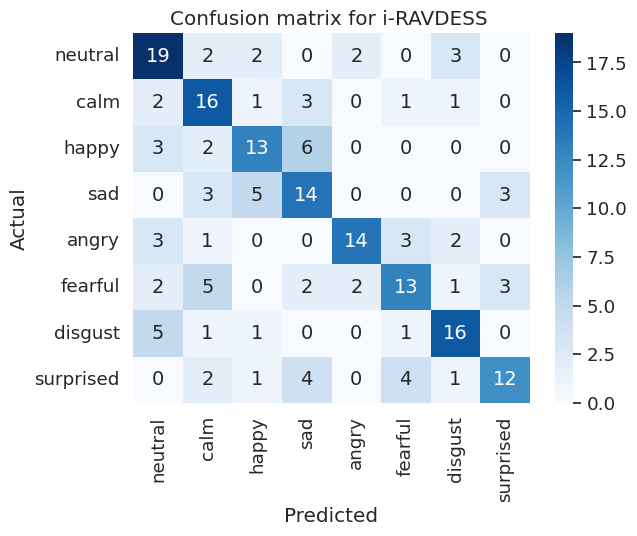

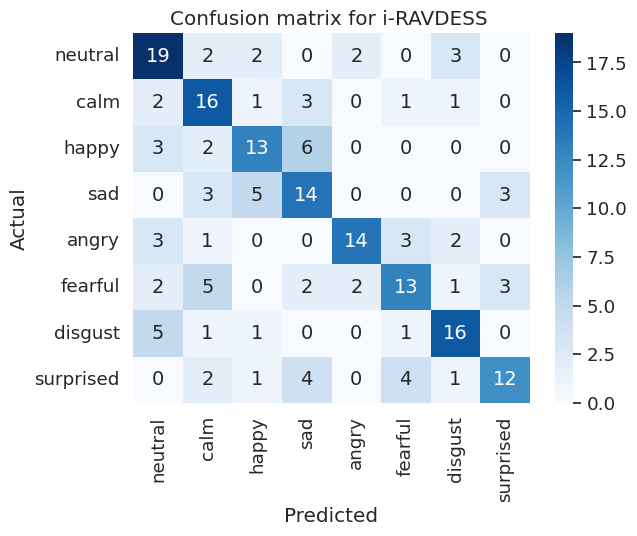

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=100, n_classes=8, n_clusters_per_class=1, random_state=42, n_informative=3)
# print("This is the label:", y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (e.g., Support Vector Machine)
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

print("This is the y_test(actual, taget label):", y_test)
print("This is the y_pred:", y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("This is the cm:", cm)

# Print classification report (precision, recall, f1-score, support)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize confusion matrix using seaborn
classes=["neutral", "calm", "happy", "sad", "angry", "fearful", "disgust", "surprised"]
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14}, xticklabels=classes, yticklabels=classes)
plt.title('Confusion matrix for i-RAVDESS ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

sns_plot=sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14}, xticklabels=classes, yticklabels=classes)
plt.title('Confusion matrix for i-RAVDESS ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
sns_plot.figure.savefig('output_figure.png', dpi=300, bbox_inches="tight")

#### the real data on the i-RAVDESS

<class 'pandas.core.frame.DataFrame'> (1137, 8)
<class 'pandas.core.frame.DataFrame'> (1137, 8)
[0 0 0 ... 2 4 6]
[1 3 0 ... 0 4 3]
0.5408970976253298
This is the cm: [[ 34  25   6   9   1   0   5   2]
 [ 21 111   1  15   1   2   5   1]
 [  7   4  64  11  21  14  10  20]
 [ 12  17  15  64   4  15  19   9]
 [  0   6  10   3 106   8   8  11]
 [  3   3  18  18  13  61  10  21]
 [  3   4  12  13  10   9  77  17]
 [  2   1  15   8   4   9  11  98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.41      0.41        82
           1       0.65      0.71      0.68       157
           2       0.45      0.42      0.44       151
           3       0.45      0.41      0.43       155
           4       0.66      0.70      0.68       152
           5       0.52      0.41      0.46       147
           6       0.53      0.53      0.53       145
           7       0.55      0.66      0.60       148

    accuracy                           0

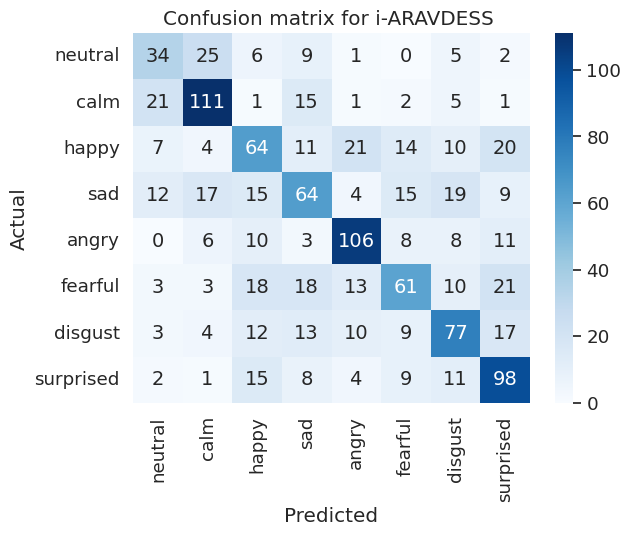

In [20]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report

target_dataset_address= "./confusion matrix for five short dataset/i-RAVDESS/target.csv"
df = pd.read_csv(target_dataset_address, header=None)
print(type(df), df.shape)

Predicted_dataset_address= "./confusion matrix for five short dataset/i-RAVDESS/predictions_35.csv"
df_pre = pd.read_csv(Predicted_dataset_address, header=None)
print(type(df_pre), df_pre.shape)

print(np.argmax(df, 1))
print(np.argmax(df_pre, 1))

y_test = np.argmax(df, 1)
y_pred = np.argmax(df_pre, 1) 

acc = metrics.accuracy_score(np.argmax(df, 1), np.argmax(df_pre, 1))
print(acc)
cm = confusion_matrix(y_test, y_pred)
print("This is the cm:", cm)

# Print classification report (precision, recall, f1-score, support)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize confusion matrix using seaborn
classes=["neutral", "calm", "happy", "sad", "angry", "fearful", "disgust", "surprised"]
sns.set(font_scale=1.2)
sns_plot=sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14}, xticklabels=classes, yticklabels=classes)
plt.title('Confusion matrix for i-ARAVDESS ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
sns_plot.figure.savefig('cm_i-ARAVDESS.png', dpi=300, bbox_inches="tight")

#### the real data on the i-AAESDD

<class 'pandas.core.frame.DataFrame'> (648, 5)
<class 'pandas.core.frame.DataFrame'> (648, 5)
0.7037037037037037
This is the cm: [[ 72  12   3  23   2]
 [  8  94  16  21   7]
 [  5   8  82  13  11]
 [ 15  17  16  78   2]
 [  1   4   6   2 130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.64      0.68       112
           1       0.70      0.64      0.67       146
           2       0.67      0.69      0.68       119
           3       0.57      0.61      0.59       128
           4       0.86      0.91      0.88       143

    accuracy                           0.70       648
   macro avg       0.70      0.70      0.70       648
weighted avg       0.70      0.70      0.70       648



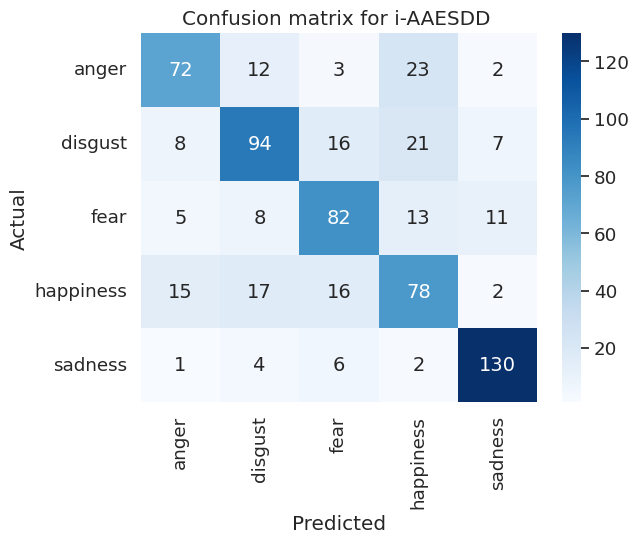

In [35]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report

target_dataset_address= "./confusion matrix for five short dataset/i-AAESDD/target.csv"
df = pd.read_csv(target_dataset_address, header=None)
print(type(df), df.shape)

Predicted_dataset_address= "./confusion matrix for five short dataset/i-AAESDD/predictions_50.csv"
df_pre = pd.read_csv(Predicted_dataset_address, header=None)
print(type(df_pre), df_pre.shape)

# print(np.argmax(df, 1))
# print(np.argmax(df_pre, 1))

y_test = np.argmax(df, 1)
y_pred = np.argmax(df_pre, 1) 

acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

cm = confusion_matrix(y_test, y_pred)
print("This is the cm:", cm)

# Print classification report (precision, recall, f1-score, support)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize confusion matrix using seaborn
classes=["anger", "disgust", "fear", "happiness", "sadness"]
sns.set(font_scale=1.2)
sns_plot=sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14}, xticklabels=classes, yticklabels=classes)
plt.title('Confusion matrix for i-AAESDD ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
sns_plot.figure.savefig('cm_i-AAESDD.png', dpi=300, bbox_inches="tight")

#### the real data on the i-AReaLISED

<class 'pandas.core.frame.DataFrame'> (777, 18)
<class 'pandas.core.frame.DataFrame'> (777, 18)
0.8906048906048906
This is the cm: [[ 28   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  26   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   9   0   4   3   1   0   0   0   0   0   1   1   4   0   0   1]
 [  0   0   0  31   0   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   3   0  14   4   0   0   0   0   0   0   0   0   3   0   1   4]
 [  0   0   3   0   6  21   2   0   0   0   0   0   0   0   2   0   0   0]
 [  0   1   0   0   0   2  24   0   0   0   1   0   0   0   4   0   0   0]
 [  0   0   0   0   0   0   0  22   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   3   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0 229   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   

/home/huawei/anaconda3/envs/testing/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huawei/anaconda3/envs/testing/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huawei/anaconda3/envs/testing/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

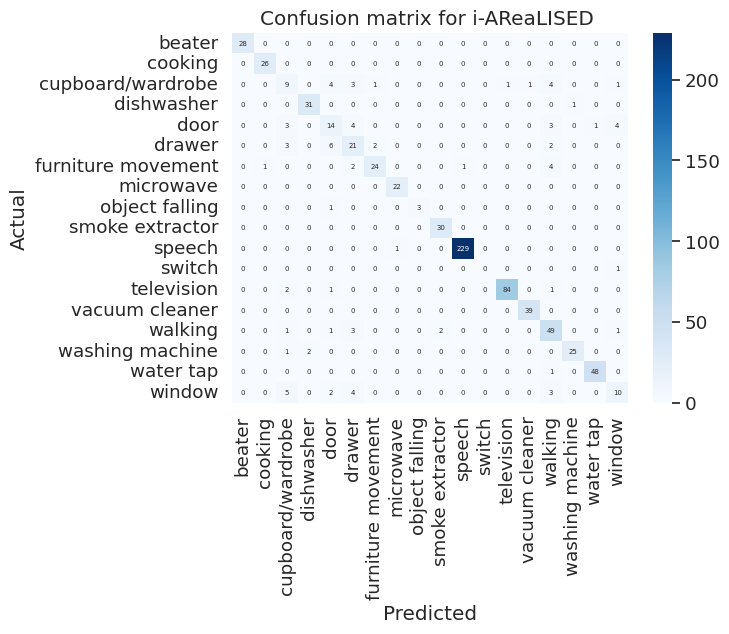

In [51]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report

target_dataset_address= "./confusion matrix for five short dataset/i-AReaLISED/target.csv"
df = pd.read_csv(target_dataset_address, header=None)
print(type(df), df.shape)

Predicted_dataset_address= "./confusion matrix for five short dataset/i-AReaLISED/predictions_50.csv"
df_pre = pd.read_csv(Predicted_dataset_address, header=None)
print(type(df_pre), df_pre.shape)

y_test = np.argmax(df, 1)
y_pred = np.argmax(df_pre, 1) 

acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

cm = confusion_matrix(y_test, y_pred)
print("This is the cm:", cm)

# Print classification report (precision, recall, f1-score, support)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Assuming your CSV file is named 'your_file.csv'
file_path = './confusion matrix for five short dataset/i-AReaLISED/Indoor_class_labels_indices.csv'

# Read the CSV file without a header
df = pd.read_csv(file_path)
value = df.values.tolist()
# Display the DataFrame
print(value)

new_list=[]
for k in range(len(value)):
    new_list.append(value[k][-1])

print(new_list)


# Visualize confusion matrix using seaborn
# classes=["beater", "cooking", "cupboard/wardrobe", "dishwasher", "door"]
sns.set(font_scale=1.2)
sns_plot=sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 5}, xticklabels=new_list, yticklabels=new_list)
plt.title('Confusion matrix for i-AReaLISED ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
sns_plot.figure.savefig('cm_i-AReaLISED.png', dpi=300, bbox_inches="tight")

#### i-AESC-50

<class 'pandas.core.frame.DataFrame'> (1535, 50)
<class 'pandas.core.frame.DataFrame'> (1535, 50)
0.9407166123778502
This is the cm: [[40  0  0 ...  0  0  0]
 [ 1 21  0 ...  0  0  0]
 [ 1  0 25 ...  0  0  0]
 ...
 [ 0  0  0 ... 28  0  0]
 [ 0  0  0 ...  0 15  0]
 [ 0  0  0 ...  0  0 58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       0.91      0.91      0.91        23
           2       0.96      0.86      0.91        29
           3       0.82      0.93      0.87        15
           4       1.00      0.98      0.99        45
           5       0.93      0.76      0.84        17
           6       0.92      0.82      0.87        28
           7       0.97      0.91      0.94        33
           8       0.92      0.80      0.86        15
           9       0.97      1.00      0.99        33
          10       0.96      0.98      0.97        49
          11       0.96      1.00     

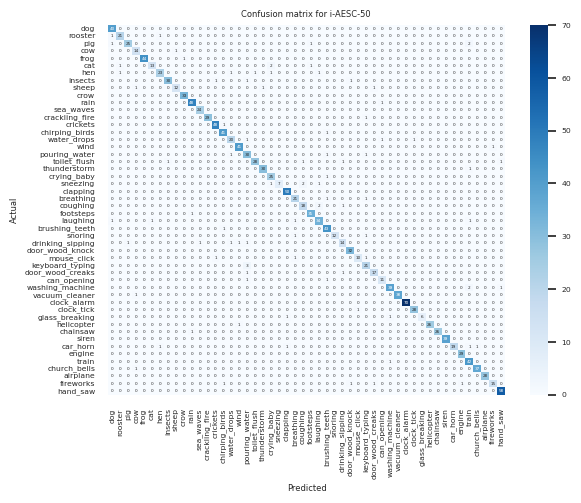

In [57]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report

target_dataset_address= "./confusion matrix for five short dataset/i-AESC-50/target.csv"
df = pd.read_csv(target_dataset_address, header=None)
print(type(df), df.shape)

Predicted_dataset_address= "./confusion matrix for five short dataset/i-AESC-50/cum_predictions.csv"
df_pre = pd.read_csv(Predicted_dataset_address, header=None)
print(type(df_pre), df_pre.shape)

y_test = np.argmax(df, 1)
y_pred = np.argmax(df_pre, 1) 

acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

######################################################################3
cm = confusion_matrix(y_test, y_pred)
print("This is the cm:", cm)

# Print classification report (precision, recall, f1-score, support)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Assuming your CSV file is named 'your_file.csv'
file_path = './confusion matrix for five short dataset/i-AESC-50/esc_class_labels_indices.csv'

# Read the CSV file without a header
df = pd.read_csv(file_path)
value = df.values.tolist()
# Display the DataFrame
print(value)

new_list=[]
for k in range(len(value)):
    new_list.append(value[k][-1])

print(new_list)

# Visualize confusion matrix using seaborn
# classes=["beater", "cooking", "cupboard/wardrobe", "dishwasher", "door"]
sns.set(font_scale=0.5)
sns_plot=sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 3}, xticklabels=new_list, yticklabels=new_list)
plt.title('Confusion matrix for i-AESC-50 ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
sns_plot.figure.savefig('cm_i-AESC-50.png', dpi=300, bbox_inches="tight")

#### i-AUrbanSound8K

<class 'pandas.core.frame.DataFrame'> (9863, 10)
<class 'pandas.core.frame.DataFrame'> (9863, 10)
0.9625874480381222
This is the cm: [[1347    0    4    0    1    0    1    1    1    4]
 [   0  424    2    0    0    1    0    1    1   15]
 [   5    0 1037    8    8   10    0    1   13   28]
 [   2    0   22 1120    3    0    0    0    6   14]
 [   0    0    5    2 1031    2    0   17    1    3]
 [   2    1    4    0    0 1054    0    2    2    3]
 [   5    0   10    1    1   13  194    3    1   21]
 [   0    0    2    0    9    0    0  970    0    3]
 [   0    0   24    0    1    0    0    0 1024    3]
 [   4    4   39    1    4   10    1    5    8 1293]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1359
           1       0.99      0.95      0.97       444
           2       0.90      0.93      0.92      1110
           3       0.99      0.96      0.97      1167
           4       0.97      0.97      0.

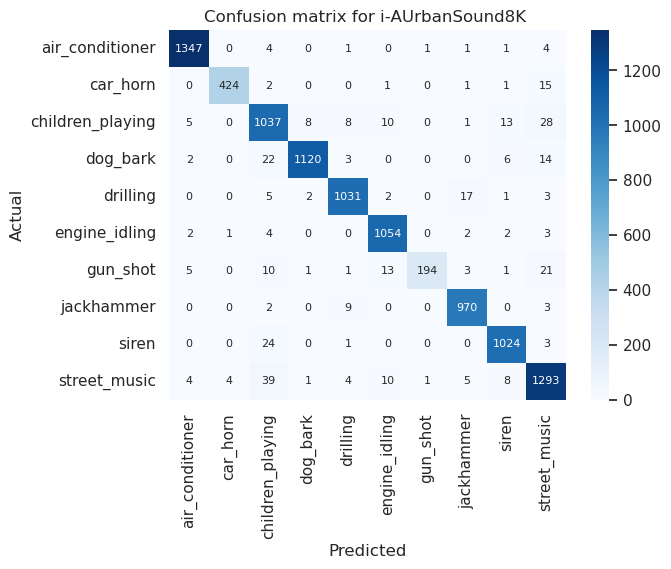

In [60]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report

target_dataset_address= "./confusion matrix for five short dataset/i-AUrbanSound8K/target.csv"
df = pd.read_csv(target_dataset_address, header=None)
print(type(df), df.shape)

Predicted_dataset_address= "./confusion matrix for five short dataset/i-AUrbanSound8K/cum_predictions.csv"
df_pre = pd.read_csv(Predicted_dataset_address, header=None)
print(type(df_pre), df_pre.shape)

y_test = np.argmax(df, 1)
y_pred = np.argmax(df_pre, 1) 

acc = metrics.accuracy_score(y_test, y_pred)
print(acc)


######################################################################3
cm = confusion_matrix(y_test, y_pred)
print("This is the cm:", cm)

# Print classification report (precision, recall, f1-score, support)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Assuming your CSV file is named 'your_file.csv'
file_path = './confusion matrix for five short dataset/i-AUrbanSound8K/Urbansound8K_class_labels_indices.csv'

# Read the CSV file without a header
df = pd.read_csv(file_path)
value = df.values.tolist()
# Display the DataFrame
print(value)

new_list=[]
for k in range(len(value)):
    new_list.append(value[k][-1])

print(new_list)

# Visualize confusion matrix using seaborn
# classes=["beater", "cooking", "cupboard/wardrobe", "dishwasher", "door"]
sns.set(font_scale=1)
sns_plot=sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 8}, xticklabels=new_list, yticklabels=new_list)
plt.title('Confusion matrix for i-AUrbanSound8K ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
sns_plot.figure.savefig('cm_i-AUrbanSound8K.png', dpi=300, bbox_inches="tight")

#### Reading the class indices file

In [48]:
import pandas as pd

# Assuming your CSV file is named 'your_file.csv'
file_path = './confusion matrix for five short dataset/i-AReaLISED/Indoor_class_labels_indices.csv'

# Read the CSV file without a header
df = pd.read_csv(file_path)
value = df.values.tolist()
# Display the DataFrame
print(value)

new_list=[]
for k in range(len(value)):
    new_list.append(value[k][-1])

print(new_list)

[[0, '/m/07rwj00', 'beater'], [1, '/m/07rwj01', 'cooking'], [2, '/m/07rwj02', 'cupboard/wardrobe'], [3, '/m/07rwj03', 'dishwasher'], [4, '/m/07rwj04', 'door'], [5, '/m/07rwj05', 'drawer'], [6, '/m/07rwj06', 'furniture movement'], [7, '/m/07rwj07', 'microwave'], [8, '/m/07rwj08', 'object falling'], [9, '/m/07rwj09', 'smoke extractor'], [10, '/m/07rwj10', 'speech'], [11, '/m/07rwj11', 'switch'], [12, '/m/07rwj12', 'television'], [13, '/m/07rwj13', 'vacuum cleaner'], [14, '/m/07rwj14', 'walking'], [15, '/m/07rwj15', 'washing machine'], [16, '/m/07rwj16', 'water tap'], [17, '/m/07rwj17', 'window']]
['beater', 'cooking', 'cupboard/wardrobe', 'dishwasher', 'door', 'drawer', 'furniture movement', 'microwave', 'object falling', 'smoke extractor', 'speech', 'switch', 'television', 'vacuum cleaner', 'walking', 'washing machine', 'water tap', 'window']


#### sklearn.datasets.make_classification

In [23]:
from sklearn.datasets import make_classification

# Generate sample data
X, y = make_classification(n_samples=20, n_features=100, n_classes=8, n_clusters_per_class=1, random_state=42, n_informative=3)
print("This is the Label:", y)

This is the Label: [1 1 5 0 3 2 1 2 6 4 7 0 3 2 3 5 7 6 0 4]


#### sklearn.metrics.confusion_matrix()

In [ ]:
#### sklearn.metrics.confusion_matrix()

from sklearn.metrics import confusion_matrix

target_value=[]
predicted_value=[]

# Compute confusion matrix
cm = confusion_matrix(target_value, predicted_value)
print(cm)

#### from sklearn.metrics.classification_report

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_pred))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate sample data with 8 categories
X, y = make_classification(n_samples=1000, n_features=20, n_classes=8, n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (e.g., Random Forest)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print classification report (precision, recall, f1-score, support)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize confusion matrix using seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ValueError: n_classes(8) * n_clusters_per_class(1) must be smaller or equal 2**n_informative(2)=4

#### sklearn.datasets.make_classification(), n_clusters_per_class

In [8]:
from sklearn.datasets import make_multilabel_classification

# Generate sample data with 8 categories
X, y = make_multilabel_classification(n_samples=1000, n_features=20, n_classes=8, random_state=42)
print("This is the Label:",y)

This is the Label: [[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 1 ... 0 0 1]
 ...
 [1 1 0 ... 0 0 1]
 [1 1 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
